## Packages/Libraries

In [30]:
suppressMessages(
  {
    library(ggplot2)
    library(dplyr)
    library(leaflet)
    library(ggmap)
  }
)
options(repr.plot.width=6, repr.plot.height=4)

Warning message:
"package 'ggmap' was built under R version 3.6.3"

## Data

In [3]:
data = read.csv("beijing.csv"); dim(data)

[1] 318851     26

In [4]:
head(data)

url                                                id           Lng     
1 https://bj.lianjia.com/chengjiao/101084782030.html 101084782030 116.4755
2 https://bj.lianjia.com/chengjiao/101086012217.html 101086012217 116.4539
3 https://bj.lianjia.com/chengjiao/101086041636.html 101086041636 116.5620
4 https://bj.lianjia.com/chengjiao/101086406841.html 101086406841 116.4380
5 https://bj.lianjia.com/chengjiao/101086920653.html 101086920653 116.4284
6 https://bj.lianjia.com/chengjiao/101087277815.html 101087277815 116.4663
  Lat      Cid          tradeTime  DOM  followers totalPrice price ...
1 40.01952 1.111027e+12 2016-08-09 1464 106        415.0     31680 ...
2 39.88153 1.111027e+12 2016-07-28  903 126        575.0     43436 ...
3 39.87714 1.111041e+12 2016-12-11 1271  48       1030.0     52021 ...
4 40.07611 1.111043e+12 2016-09-30  965 138        297.5     22202 ...
5 39.88623 1.111027e+12 2016-08-28  927 286        392.0     48396 ...
6 39.99136 1.111027e+12 2016-07-22  861  57        275.6     52000 ...
  buildingType constructionTime renovationCondition buildingStructure
1 1            2005             3                   6                
2 1            2004             4                   6                
3 4            2005             3                   6                
4 1            2008             1                   6                
5 4            1960             2                   2                
6 4            2005             3                   6                
  ladderRatio elevator fiveYearsProperty subway district communityAverage
1 0.217       1        0                 1      7        56021           
2 0.667       1        1                 0      7        71539           
3 0.500       1        0                 0      7        48160           
4 0.273       1        0                 0      6        51238           
5 0.333       0        1                 1      1        62588           
6 0.333       1        1                 0      7        67738

In [5]:
names(data)

[1] "url"                 "id"                  "Lng"                
 [4] "Lat"                 "Cid"                 "tradeTime"          
 [7] "DOM"                 "followers"           "totalPrice"         
[10] "price"               "square"              "livingRoom"         
[13] "drawingRoom"         "kitchen"             "bathRoom"           
[16] "floor"               "buildingType"        "constructionTime"   
[19] "renovationCondition" "buildingStructure"   "ladderRatio"        
[22] "elevator"            "fiveYearsProperty"   "subway"             
[25] "district"            "communityAverage"

In [6]:
length(unique(data$district))

[1] 13

In [7]:
temp = sapply(data, function(x){sum(is.na(x))})
temp[as.numeric(which(temp>0))]

DOM      buildingType          elevator fiveYearsProperty 
           157977              2021                32                32 
           subway  communityAverage 
               32               463

In [8]:
temp = sapply(data, function(x){length(unique(factor(x)))})
temp[as.numeric(which(temp>0))]

url                  id                 Lng                 Lat 
             318851              318851                3995                3993 
                Cid           tradeTime                 DOM           followers 
               4035                2560                 552                 547 
         totalPrice               price              square          livingRoom 
               5780               80042               18298                  11 
        drawingRoom             kitchen            bathRoom               floor 
                 22                   5                  18                 203 
       buildingType    constructionTime renovationCondition   buildingStructure 
                 13                  74                   5                   7 
        ladderRatio            elevator   fiveYearsProperty              subway 
                183                   3                   3                   3 
           district    communityAverage 
                 13                4073

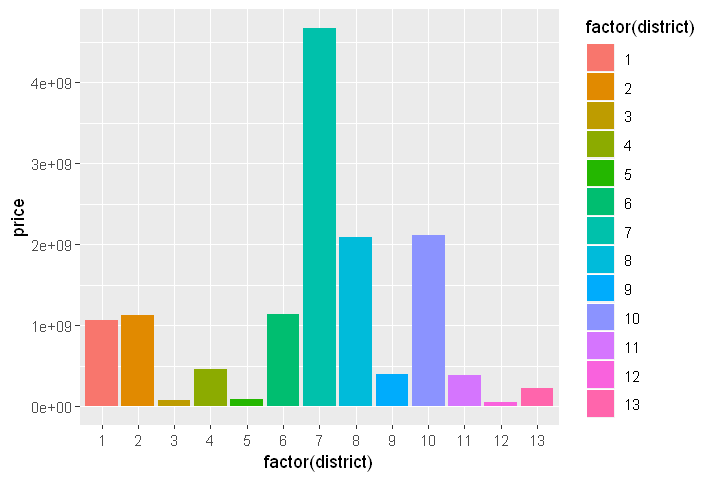

In [9]:
ggplot(data, 
       aes(y = price, x = factor(district), fill = factor(district))
      ) + geom_bar(stat = "identity") 

In [47]:
data %>% 
    leaflet() %>%
    addTiles() %>%
    addMarkers(clusterOptions = markerClusterOptions()) %>%
    htmltools::tagList()

Assuming "Lng" and "Lat" are longitude and latitude, respectively


Shiny tags cannot be represented in plain text (need html)

In [32]:
suppressWarnings({load("map/beijing_map.RData", verbose = T)})

Loading objects:
  beijing


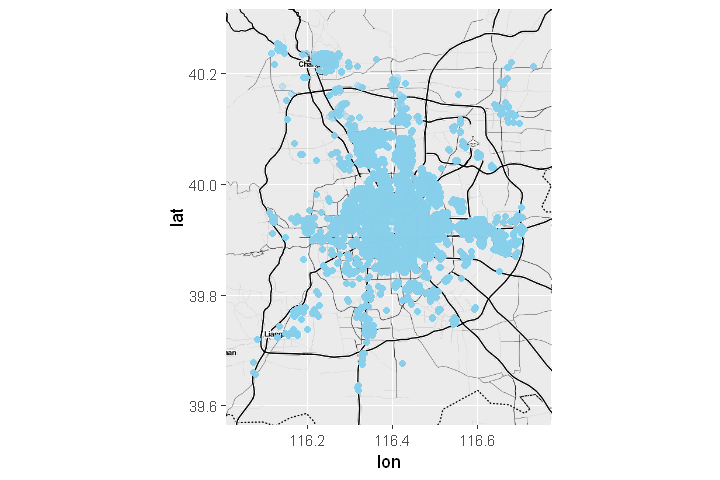

In [46]:
beijing + geom_point(data = data, aes(x = Lng, y = Lat), colour = "skyblue", alpha = 0.4, na.rm = T)

In [48]:
range(data$price)

[1]      1 156250

In [ ]:

ggplot(
    data[order(data$price),],
    aes(x = id,
        y = price)
    ) + geom_line()